In [1163]:
pwd

'C:\\Users\\ZBook\\Desktop\\COURS 2020-2021\\S1\\Python for data analysis\\PROJET'

In [1164]:
import os
os.chdir('C:/Users/ZBook/Desktop/COURS 2020-2021/S1/Python for data analysis/PROJET')


In [1165]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [1166]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import mean_squared_error as mse
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC
from sklearn.ensemble import VotingClassifier
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import minmax_scale
from sklearn.ensemble import AdaBoostClassifier

In [1167]:
df = pd.read_table("spambase.data", sep =',', header=None)
df.columns

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
            51, 52, 53, 54, 55, 56, 57],
           dtype='int64')

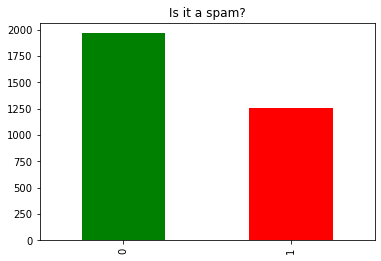

In [1168]:
count_Class=pd.value_counts(y_train, sort= True)
count_Class.plot(kind= 'bar', color= ["green", "red"])
plt.title('Is it a spam?')
plt.show()

In [ ]:
sns.heatmap(df.isnull())
plt.title('Heatmap null values')
print(df.shape()) 

Text(0.5, 1.0, 'Heatmap correlation')

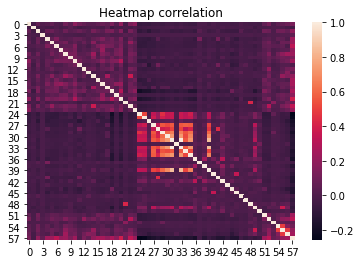

In [1170]:
sns.heatmap(df.corr())
plt.title('Heatmap correlation')

In [1171]:
#Let's work on data correlation

correlation = df_cor.corr().to_numpy()

l = len(correlation)

# mask = np.zeros_like(correlation, dtype=np.bool)
# mask[np.triu_indices_from(mask)] = True

# f, ax = plt.subplots(figsize=(20, 20))

# cmap = sns.diverging_palette(180, 20, as_cmap=True)
# sns.heatmap(correlation, mask=mask, cmap=cmap, vmax=1, vmin =-1, center=0,
#             square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

# plt.show()
def listcor(cor,seuil):
    list_cor = []
    for i in range(l):
        for j in range(i+1,l):
            if cor[i,j]> seuil:
                list_cor+=[[i,j]]
    return(list_cor)

def list_correlated(data,seuil):
    list_elem = []
    cpt = -1
    ref = 0
    correlation = data.corr().to_numpy()
    list_corr=listcor(correlation,seuil)
    for elem in list_corr :
        if elem[0] != ref :
            ref = elem[0]
            list_elem.append([elem[0]])
            cpt+=1
            list_elem[cpt].append(elem[1])              
        else :
            list_elem[cpt].append(elem[1])   #on a la liste des elements corrélés entre eux
    return(list_elem)
            
a = list_correlated(df,0.6)
print(a)
for i in range(len(a[0])):
    print(i)
    b = df[a[0][i]].corr(df[57])
    print(b)
    print(a[0][i])
    

# ces features ont de toute facon une très faible corrélation avec la prediction de spam, on les retirera donc au préalable dans 
# une des versions testées ci-après



[[29, 30, 31, 33, 35, 39], [30, 31, 33, 35, 39], [31, 33, 35, 39], [33, 35, 39], [35, 39]]
0
-0.1710945875470931
29
1
-0.12691215770486758
30
2
-0.11421403277162036
31
3
-0.11275418527473718
33
4
-0.13613420484604244
35
5
-0.06480120227696293
39


In [1172]:
dict_1={}

dict_1=dict(df.corr()[57])
dict_1

{0: 0.1262075747276322,
 1: -0.030223579212021543,
 2: 0.1969879726831455,
 3: 0.05737138961858829,
 4: 0.2419204377148765,
 5: 0.232604300172187,
 6: 0.3321174156141586,
 7: 0.20680847576170805,
 8: 0.23155143128601532,
 9: 0.13896211329514088,
 10: 0.23452927138249544,
 11: 0.007740737297956368,
 12: 0.13292672586847548,
 13: 0.060027316399873264,
 14: 0.19590245671258405,
 15: 0.26321469903669603,
 16: 0.2632039828223917,
 17: 0.20420813879714014,
 18: 0.2736512865572106,
 19: 0.1897611485080607,
 20: 0.3832338192835756,
 21: 0.09186009631515232,
 22: 0.3347870388457389,
 23: 0.21611098224724426,
 24: -0.2567229163126616,
 25: -0.23296768680660979,
 26: -0.1834040051933605,
 27: -0.15880024911827956,
 28: -0.13352318779632708,
 29: -0.1710945875471117,
 30: -0.1269121577048615,
 31: -0.11421403277162386,
 32: -0.11993101263694417,
 33: -0.11275418527472239,
 34: -0.14922521446054307,
 35: -0.13613420484603733,
 36: -0.17804545978118416,
 37: -0.03103528941229571,
 38: -0.12283065400

In [1173]:
list_features=[]
for key,values in dict_1.items():    
    if abs(values)<0.15:
        list_features.append(key)
list_features

[0,
 1,
 3,
 9,
 11,
 12,
 13,
 21,
 28,
 30,
 31,
 32,
 33,
 34,
 35,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 53,
 54]

In [1174]:
y = df[np.shape(df)[1]-1]
x= df.drop([np.shape(df)[1]-1],axis = 1)

In [1175]:
#D'abord x et y sans preprocessing

In [1176]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.3)

In [1177]:
LR = LogisticRegression(max_iter=10000)

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(LR, x_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
LR_fit_time = scores['fit_time'].mean()
LR_score_time = scores['score_time'].mean()
LR_accuracy = scores['test_accuracy'].mean()
LR_precision = scores['test_precision_macro'].mean()
LR_recall = scores['test_recall_macro'].mean()
LR_f1 = scores['test_f1_weighted'].mean()
LR_roc = scores['test_roc_auc'].mean()

In [1178]:
decision_tree = DecisionTreeClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(decision_tree, x_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
dtree_fit_time = scores['fit_time'].mean()
dtree_score_time = scores['score_time'].mean()
dtree_accuracy = scores['test_accuracy'].mean()
dtree_precision = scores['test_precision_macro'].mean()
dtree_recall = scores['test_recall_macro'].mean()
dtree_f1 = scores['test_f1_weighted'].mean()
dtree_roc = scores['test_roc_auc'].mean()

In [1179]:
SVM = SVC(probability = True)

scoring = ['accuracy','precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(SVM, x_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
SVM_fit_time = scores['fit_time'].mean()
SVM_score_time = scores['score_time'].mean()
SVM_accuracy = scores['test_accuracy'].mean()
SVM_precision = scores['test_precision_macro'].mean()
SVM_recall = scores['test_recall_macro'].mean()
SVM_f1 = scores['test_f1_weighted'].mean()
SVM_roc = scores['test_roc_auc'].mean()

In [1180]:
LDA = LinearDiscriminantAnalysis()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(LDA, x_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
LDA_fit_time = scores['fit_time'].mean()
LDA_score_time = scores['score_time'].mean()
LDA_accuracy = scores['test_accuracy'].mean()
LDA_precision = scores['test_precision_macro'].mean()
LDA_recall = scores['test_recall_macro'].mean()
LDA_f1 = scores['test_f1_weighted'].mean()
LDA_roc = scores['test_roc_auc'].mean()

In [1181]:
QDA = QuadraticDiscriminantAnalysis()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(QDA, x_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
QDA_fit_time = scores['fit_time'].mean()
QDA_score_time = scores['score_time'].mean()
QDA_accuracy = scores['test_accuracy'].mean()
QDA_precision = scores['test_precision_macro'].mean()
QDA_recall = scores['test_recall_macro'].mean()
QDA_f1 = scores['test_f1_weighted'].mean()
QDA_roc = scores['test_roc_auc'].mean()

C:\Users\ZBook\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\ZBook\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\ZBook\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\ZBook\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\ZBook\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\ZBook\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\ZBook\anaconda3\lib\site-

In [1182]:
random_forest = RandomForestClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(random_forest, x_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
forest_fit_time = scores['fit_time'].mean()
forest_score_time = scores['score_time'].mean()
forest_accuracy = scores['test_accuracy'].mean()
forest_precision = scores['test_precision_macro'].mean()
forest_recall = scores['test_recall_macro'].mean()
forest_f1 = scores['test_f1_weighted'].mean()
forest_roc = scores['test_roc_auc'].mean()

In [1183]:
KNN = KNeighborsClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(KNN, x_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
KNN_fit_time = scores['fit_time'].mean()
KNN_score_time = scores['score_time'].mean()
KNN_accuracy = scores['test_accuracy'].mean()
KNN_precision = scores['test_precision_macro'].mean()
KNN_recall = scores['test_recall_macro'].mean()
KNN_f1 = scores['test_f1_weighted'].mean()
KNN_roc = scores['test_roc_auc'].mean()

In [1184]:
bayes = GaussianNB()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(bayes, x_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
bayes_fit_time = scores['fit_time'].mean()
bayes_score_time = scores['score_time'].mean()
bayes_accuracy = scores['test_accuracy'].mean()
bayes_precision = scores['test_precision_macro'].mean()
bayes_recall = scores['test_recall_macro'].mean()
bayes_f1 = scores['test_f1_weighted'].mean()
bayes_roc = scores['test_roc_auc'].mean()

In [1185]:
GB = GradientBoostingClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(GB, x_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
gb_fit_time = scores['fit_time'].mean()
gb_score_time = scores['score_time'].mean()
gb_accuracy = scores['test_accuracy'].mean()
gb_precision = scores['test_precision_macro'].mean()
gb_recall = scores['test_recall_macro'].mean()
gb_f1 = scores['test_f1_weighted'].mean()
gb_roc = scores['test_roc_auc'].mean()


In [1186]:
AB = AdaBoostClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(AB, x_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
ab_fit_time = scores['fit_time'].mean()
ab_score_time = scores['score_time'].mean()
ab_accuracy = scores['test_accuracy'].mean()
ab_precision = scores['test_precision_macro'].mean()
ab_recall = scores['test_recall_macro'].mean()
ab_f1 = scores['test_f1_weighted'].mean()
ab_roc = scores['test_roc_auc'].mean()



In [1187]:
models_initial = pd.DataFrame({
    'Model'       : ['Logistic Regression', 'Decision Tree', 'Support Vector Machine', 'Linear Discriminant Analysis', 'Quadratic Discriminant Analysis', 'Random Forest', 'K-Nearest Neighbors', 'Bayes','Gradient Boosting','Adaptative Boosting'],
    'Fitting time': [LR_fit_time, dtree_fit_time, SVM_fit_time, LDA_fit_time, QDA_fit_time, forest_fit_time, KNN_fit_time, bayes_fit_time,gb_fit_time,ab_fit_time],
    'Scoring time': [LR_score_time, dtree_score_time, SVM_score_time, LDA_score_time, QDA_score_time, forest_score_time, KNN_score_time, bayes_score_time,gb_score_time,ab_score_time],
    'Accuracy'    : [LR_accuracy, dtree_accuracy, SVM_accuracy, LDA_accuracy, QDA_accuracy, forest_accuracy, KNN_accuracy, bayes_accuracy,gb_accuracy,ab_accuracy],
    'Precision'   : [LR_precision, dtree_precision, SVM_precision, LDA_precision, QDA_precision, forest_precision, KNN_precision, bayes_precision,gb_precision,ab_precision],
    'Recall'      : [LR_recall, dtree_recall, SVM_recall, LDA_recall, QDA_recall, forest_recall, KNN_recall, bayes_recall,gb_recall,ab_recall],
    'F1_score'    : [LR_f1, dtree_f1, SVM_f1, LDA_f1, QDA_f1, forest_f1, KNN_f1, bayes_f1,gb_f1,ab_f1],
    'AUC_ROC'     : [LR_roc, dtree_roc, SVM_roc, LDA_roc, QDA_roc, forest_roc, KNN_roc, bayes_roc,gb_roc,ab_roc],
    }, columns = ['Model', 'Fitting time', 'Scoring time', 'Accuracy', 'Precision', 'Recall', 'F1_score', 'AUC_ROC'])

models_initial.sort_values(by='Precision', ascending=False)

,Model,Fitting time,Scoring time,Accuracy,Precision,Recall,F1_score,AUC_ROC
5,Random Forest,0.445889,0.025679,0.952174,0.952669,0.947007,0.951990,0.984808
8,Gradient Boosting,1.072608,0.007330,0.948447,0.948254,0.943648,0.948299,0.985347
9,Adaptative Boosting,0.281865,0.023436,0.946584,0.944953,0.942963,0.946536,0.983374
0,Logistic Regression,0.699710,0.008078,0.931677,0.931505,0.925262,0.931458,0.973868
1,Decision Tree,0.065827,0.007079,0.913665,0.909305,0.909842,0.913662,0.909842
3,Linear Discriminant Analysis,0.027574,0.008479,0.885404,0.894320,0.865712,0.883186,0.950616
7,Bayes,0.006136,0.006980,0.827950,0.836301,0.851723,0.829793,0.946415
4,Quadratic Discriminant Analysis,0.011857,0.009225,0.815528,0.828287,0.841833,0.817289,0.952514
6,K-Nearest Neighbors,0.037502,0.019346,0.795031,0.785475,0.783277,0.794643,0.858521
2,Support Vector Machine,2.738684,0.049227,0.708385,0.707495,0.658313,0.688702,0.802672


In [1188]:
#now with correlation

In [1189]:
df_corr = df
for i in list_features :
    df_corr=df_corr.drop(columns = i)
print(df_corr)

y_corr = df_corr[57]
x_corr= df_corr.drop([57],axis = 1)    

        2     4     5     6     7     8     10    14    15    16  ...   25  \
0     0.64  0.32  0.00  0.00  0.00  0.00  0.00  0.00  0.32  0.00  ...  0.0   
1     0.50  0.14  0.28  0.21  0.07  0.00  0.21  0.14  0.14  0.07  ...  0.0   
2     0.71  1.23  0.19  0.19  0.12  0.64  0.38  1.75  0.06  0.06  ...  0.0   
3     0.00  0.63  0.00  0.31  0.63  0.31  0.31  0.00  0.31  0.00  ...  0.0   
4     0.00  0.63  0.00  0.31  0.63  0.31  0.31  0.00  0.31  0.00  ...  0.0   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...  ...   
4596  0.62  0.00  0.31  0.00  0.00  0.00  0.00  0.00  0.00  0.00  ...  0.0   
4597  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  ...  0.0   
4598  0.30  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  ...  0.0   
4599  0.00  0.32  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  ...  0.0   
4600  0.65  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  ...  0.0   

       26   27   29    36     51     52   55    56  57  
0     

In [1190]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x_corr,y_corr,random_state=0,test_size=0.3)

In [1191]:
LR = LogisticRegression(max_iter=10000)

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(LR, x_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
LR_fit_time = scores['fit_time'].mean()
LR_score_time = scores['score_time'].mean()
LR_accuracy = scores['test_accuracy'].mean()
LR_precision = scores['test_precision_macro'].mean()
LR_recall = scores['test_recall_macro'].mean()
LR_f1 = scores['test_f1_weighted'].mean()
LR_roc = scores['test_roc_auc'].mean()

In [1192]:
decision_tree = DecisionTreeClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(decision_tree, x_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
dtree_fit_time = scores['fit_time'].mean()
dtree_score_time = scores['score_time'].mean()
dtree_accuracy = scores['test_accuracy'].mean()
dtree_precision = scores['test_precision_macro'].mean()
dtree_recall = scores['test_recall_macro'].mean()
dtree_f1 = scores['test_f1_weighted'].mean()
dtree_roc = scores['test_roc_auc'].mean()

In [1193]:
SVM = SVC(probability = True)

scoring = ['accuracy','precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(SVM, x_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
SVM_fit_time = scores['fit_time'].mean()
SVM_score_time = scores['score_time'].mean()
SVM_accuracy = scores['test_accuracy'].mean()
SVM_precision = scores['test_precision_macro'].mean()
SVM_recall = scores['test_recall_macro'].mean()
SVM_f1 = scores['test_f1_weighted'].mean()
SVM_roc = scores['test_roc_auc'].mean()

In [1194]:
LDA = LinearDiscriminantAnalysis()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(LDA, x_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
LDA_fit_time = scores['fit_time'].mean()
LDA_score_time = scores['score_time'].mean()
LDA_accuracy = scores['test_accuracy'].mean()
LDA_precision = scores['test_precision_macro'].mean()
LDA_recall = scores['test_recall_macro'].mean()
LDA_f1 = scores['test_f1_weighted'].mean()
LDA_roc = scores['test_roc_auc'].mean()

In [1195]:
QDA = QuadraticDiscriminantAnalysis()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(QDA, x_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
QDA_fit_time = scores['fit_time'].mean()
QDA_score_time = scores['score_time'].mean()
QDA_accuracy = scores['test_accuracy'].mean()
QDA_precision = scores['test_precision_macro'].mean()
QDA_recall = scores['test_recall_macro'].mean()
QDA_f1 = scores['test_f1_weighted'].mean()
QDA_roc = scores['test_roc_auc'].mean()

In [1196]:
random_forest = RandomForestClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(random_forest, x_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
forest_fit_time = scores['fit_time'].mean()
forest_score_time = scores['score_time'].mean()
forest_accuracy = scores['test_accuracy'].mean()
forest_precision = scores['test_precision_macro'].mean()
forest_recall = scores['test_recall_macro'].mean()
forest_f1 = scores['test_f1_weighted'].mean()
forest_roc = scores['test_roc_auc'].mean()

In [1197]:
KNN = KNeighborsClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(KNN, x_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
KNN_fit_time = scores['fit_time'].mean()
KNN_score_time = scores['score_time'].mean()
KNN_accuracy = scores['test_accuracy'].mean()
KNN_precision = scores['test_precision_macro'].mean()
KNN_recall = scores['test_recall_macro'].mean()
KNN_f1 = scores['test_f1_weighted'].mean()
KNN_roc = scores['test_roc_auc'].mean()

In [1198]:
bayes = GaussianNB()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(bayes, x_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
bayes_fit_time = scores['fit_time'].mean()
bayes_score_time = scores['score_time'].mean()
bayes_accuracy = scores['test_accuracy'].mean()
bayes_precision = scores['test_precision_macro'].mean()
bayes_recall = scores['test_recall_macro'].mean()
bayes_f1 = scores['test_f1_weighted'].mean()
bayes_roc = scores['test_roc_auc'].mean()

In [1199]:
GB = GradientBoostingClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(GB, x_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
gb_fit_time = scores['fit_time'].mean()
gb_score_time = scores['score_time'].mean()
gb_accuracy = scores['test_accuracy'].mean()
gb_precision = scores['test_precision_macro'].mean()
gb_recall = scores['test_recall_macro'].mean()
gb_f1 = scores['test_f1_weighted'].mean()
gb_roc = scores['test_roc_auc'].mean()


In [1200]:
AB = AdaBoostClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(AB, x_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
ab_fit_time = scores['fit_time'].mean()
ab_score_time = scores['score_time'].mean()
ab_accuracy = scores['test_accuracy'].mean()
ab_precision = scores['test_precision_macro'].mean()
ab_recall = scores['test_recall_macro'].mean()
ab_f1 = scores['test_f1_weighted'].mean()
ab_roc = scores['test_roc_auc'].mean()



In [1201]:
models_initial = pd.DataFrame({
    'Model'       : ['Logistic Regression', 'Decision Tree', 'Support Vector Machine', 'Linear Discriminant Analysis', 'Quadratic Discriminant Analysis', 'Random Forest', 'K-Nearest Neighbors', 'Bayes','Gradient Boosting','Adaptative Boosting'],
    'Fitting time': [LR_fit_time, dtree_fit_time, SVM_fit_time, LDA_fit_time, QDA_fit_time, forest_fit_time, KNN_fit_time, bayes_fit_time,gb_fit_time,ab_fit_time],
    'Scoring time': [LR_score_time, dtree_score_time, SVM_score_time, LDA_score_time, QDA_score_time, forest_score_time, KNN_score_time, bayes_score_time,gb_score_time,ab_score_time],
    'Accuracy'    : [LR_accuracy, dtree_accuracy, SVM_accuracy, LDA_accuracy, QDA_accuracy, forest_accuracy, KNN_accuracy, bayes_accuracy,gb_accuracy,ab_accuracy],
    'Precision'   : [LR_precision, dtree_precision, SVM_precision, LDA_precision, QDA_precision, forest_precision, KNN_precision, bayes_precision,gb_precision,ab_precision],
    'Recall'      : [LR_recall, dtree_recall, SVM_recall, LDA_recall, QDA_recall, forest_recall, KNN_recall, bayes_recall,gb_recall,ab_recall],
    'F1_score'    : [LR_f1, dtree_f1, SVM_f1, LDA_f1, QDA_f1, forest_f1, KNN_f1, bayes_f1,gb_f1,ab_f1],
    'AUC_ROC'     : [LR_roc, dtree_roc, SVM_roc, LDA_roc, QDA_roc, forest_roc, KNN_roc, bayes_roc,gb_roc,ab_roc],
    }, columns = ['Model', 'Fitting time', 'Scoring time', 'Accuracy', 'Precision', 'Recall', 'F1_score', 'AUC_ROC'])

models_initial.sort_values(by='Precision', ascending=False)

,Model,Fitting time,Scoring time,Accuracy,Precision,Recall,F1_score,AUC_ROC
5,Random Forest,0.394198,0.025431,0.942857,0.942373,0.937933,0.942723,0.978870
8,Gradient Boosting,0.599954,0.006883,0.933540,0.933606,0.926827,0.933275,0.977818
9,Adaptative Boosting,0.189844,0.020743,0.922981,0.921339,0.917040,0.922754,0.974733
0,Logistic Regression,0.386242,0.007731,0.901863,0.904057,0.889748,0.900990,0.964057
1,Decision Tree,0.025431,0.006184,0.905280,0.901045,0.901380,0.905356,0.901380
7,Bayes,0.003983,0.006979,0.895652,0.893258,0.887402,0.895242,0.946283
4,Quadratic Discriminant Analysis,0.005114,0.007332,0.896273,0.892297,0.890369,0.896182,0.947979
3,Linear Discriminant Analysis,0.013516,0.007777,0.863975,0.878131,0.838212,0.860117,0.939924
6,K-Nearest Neighbors,0.018699,0.013764,0.786025,0.776864,0.770305,0.784782,0.850468
2,Support Vector Machine,1.614449,0.030267,0.708696,0.707808,0.658710,0.689064,0.801941


In [1202]:
#now with scaling

In [1203]:
df_scaled = pd.DataFrame(minmax_scale(df))
y_scaled = df_scaled[np.shape(df_scaled)[1]-1]
x_scaled= df_scaled.drop([np.shape(df_scaled)[1]-1],axis = 1)



In [1204]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x_scaled,y_scaled,random_state=0,test_size=0.3)

In [1205]:
LR = LogisticRegression(max_iter=10000)

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(LR, x_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
LR_fit_time = scores['fit_time'].mean()
LR_score_time = scores['score_time'].mean()
LR_accuracy = scores['test_accuracy'].mean()
LR_precision = scores['test_precision_macro'].mean()
LR_recall = scores['test_recall_macro'].mean()
LR_f1 = scores['test_f1_weighted'].mean()
LR_roc = scores['test_roc_auc'].mean()

In [1206]:
decision_tree = DecisionTreeClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(decision_tree, x_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
dtree_fit_time = scores['fit_time'].mean()
dtree_score_time = scores['score_time'].mean()
dtree_accuracy = scores['test_accuracy'].mean()
dtree_precision = scores['test_precision_macro'].mean()
dtree_recall = scores['test_recall_macro'].mean()
dtree_f1 = scores['test_f1_weighted'].mean()
dtree_roc = scores['test_roc_auc'].mean()

In [1207]:
SVM = SVC(probability = True)

scoring = ['accuracy','precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(SVM, x_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
SVM_fit_time = scores['fit_time'].mean()
SVM_score_time = scores['score_time'].mean()
SVM_accuracy = scores['test_accuracy'].mean()
SVM_precision = scores['test_precision_macro'].mean()
SVM_recall = scores['test_recall_macro'].mean()
SVM_f1 = scores['test_f1_weighted'].mean()
SVM_roc = scores['test_roc_auc'].mean()

In [1208]:
LDA = LinearDiscriminantAnalysis()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(LDA, x_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
LDA_fit_time = scores['fit_time'].mean()
LDA_score_time = scores['score_time'].mean()
LDA_accuracy = scores['test_accuracy'].mean()
LDA_precision = scores['test_precision_macro'].mean()
LDA_recall = scores['test_recall_macro'].mean()
LDA_f1 = scores['test_f1_weighted'].mean()
LDA_roc = scores['test_roc_auc'].mean()

In [1209]:
QDA = QuadraticDiscriminantAnalysis()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(QDA, x_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
QDA_fit_time = scores['fit_time'].mean()
QDA_score_time = scores['score_time'].mean()
QDA_accuracy = scores['test_accuracy'].mean()
QDA_precision = scores['test_precision_macro'].mean()
QDA_recall = scores['test_recall_macro'].mean()
QDA_f1 = scores['test_f1_weighted'].mean()
QDA_roc = scores['test_roc_auc'].mean()

C:\Users\ZBook\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\ZBook\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\ZBook\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\ZBook\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\ZBook\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\ZBook\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\ZBook\anaconda3\lib\site-

In [1210]:
random_forest = RandomForestClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(random_forest, x_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
forest_fit_time = scores['fit_time'].mean()
forest_score_time = scores['score_time'].mean()
forest_accuracy = scores['test_accuracy'].mean()
forest_precision = scores['test_precision_macro'].mean()
forest_recall = scores['test_recall_macro'].mean()
forest_f1 = scores['test_f1_weighted'].mean()
forest_roc = scores['test_roc_auc'].mean()

In [1211]:
KNN = KNeighborsClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(KNN, x_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
KNN_fit_time = scores['fit_time'].mean()
KNN_score_time = scores['score_time'].mean()
KNN_accuracy = scores['test_accuracy'].mean()
KNN_precision = scores['test_precision_macro'].mean()
KNN_recall = scores['test_recall_macro'].mean()
KNN_f1 = scores['test_f1_weighted'].mean()
KNN_roc = scores['test_roc_auc'].mean()

In [1212]:
bayes = GaussianNB()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(bayes, x_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
bayes_fit_time = scores['fit_time'].mean()
bayes_score_time = scores['score_time'].mean()
bayes_accuracy = scores['test_accuracy'].mean()
bayes_precision = scores['test_precision_macro'].mean()
bayes_recall = scores['test_recall_macro'].mean()
bayes_f1 = scores['test_f1_weighted'].mean()
bayes_roc = scores['test_roc_auc'].mean()

In [1213]:
GB = GradientBoostingClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(GB, x_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
gb_fit_time = scores['fit_time'].mean()
gb_score_time = scores['score_time'].mean()
gb_accuracy = scores['test_accuracy'].mean()
gb_precision = scores['test_precision_macro'].mean()
gb_recall = scores['test_recall_macro'].mean()
gb_f1 = scores['test_f1_weighted'].mean()
gb_roc = scores['test_roc_auc'].mean()


In [1214]:
AB = AdaBoostClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(AB, x_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
ab_fit_time = scores['fit_time'].mean()
ab_score_time = scores['score_time'].mean()
ab_accuracy = scores['test_accuracy'].mean()
ab_precision = scores['test_precision_macro'].mean()
ab_recall = scores['test_recall_macro'].mean()
ab_f1 = scores['test_f1_weighted'].mean()
ab_roc = scores['test_roc_auc'].mean()



In [1215]:
models_initial1 = pd.DataFrame({
    'Model'       : ['Logistic Regression', 'Decision Tree', 'Support Vector Machine', 'Linear Discriminant Analysis', 'Quadratic Discriminant Analysis', 'Random Forest', 'K-Nearest Neighbors', 'Bayes','Gradient Boosting','Adaptative Boosting'],
    'Fitting time': [LR_fit_time, dtree_fit_time, SVM_fit_time, LDA_fit_time, QDA_fit_time, forest_fit_time, KNN_fit_time, bayes_fit_time,gb_fit_time,ab_fit_time],
    'Scoring time': [LR_score_time, dtree_score_time, SVM_score_time, LDA_score_time, QDA_score_time, forest_score_time, KNN_score_time, bayes_score_time,gb_score_time,ab_score_time],
    'Accuracy'    : [LR_accuracy, dtree_accuracy, SVM_accuracy, LDA_accuracy, QDA_accuracy, forest_accuracy, KNN_accuracy, bayes_accuracy,gb_accuracy,ab_accuracy],
    'Precision'   : [LR_precision, dtree_precision, SVM_precision, LDA_precision, QDA_precision, forest_precision, KNN_precision, bayes_precision,gb_precision,ab_precision],
    'Recall'      : [LR_recall, dtree_recall, SVM_recall, LDA_recall, QDA_recall, forest_recall, KNN_recall, bayes_recall,gb_recall,ab_recall],
    'F1_score'    : [LR_f1, dtree_f1, SVM_f1, LDA_f1, QDA_f1, forest_f1, KNN_f1, bayes_f1,gb_f1,ab_f1],
    'AUC_ROC'     : [LR_roc, dtree_roc, SVM_roc, LDA_roc, QDA_roc, forest_roc, KNN_roc, bayes_roc,gb_roc,ab_roc],
    }, columns = ['Model', 'Fitting time', 'Scoring time', 'Accuracy', 'Precision', 'Recall', 'F1_score', 'AUC_ROC'])

models_initial1.sort_values(by='Precision', ascending=False)

,Model,Fitting time,Scoring time,Accuracy,Precision,Recall,F1_score,AUC_ROC
5,Random Forest,0.512731,0.029223,0.951242,0.951593,0.946125,0.951080,0.983212
8,Gradient Boosting,1.068369,0.008481,0.948447,0.948254,0.943648,0.948299,0.985193
9,Adaptative Boosting,0.284968,0.022387,0.946584,0.944953,0.942963,0.946536,0.983374
2,Support Vector Machine,1.469075,0.028772,0.929503,0.931217,0.920794,0.929051,0.972686
1,Decision Tree,0.062583,0.006632,0.912112,0.907633,0.908260,0.912124,0.908260
3,Linear Discriminant Analysis,0.036402,0.010572,0.885404,0.894320,0.865712,0.883186,0.950616
6,K-Nearest Neighbors,0.044181,0.079590,0.894720,0.892108,0.886501,0.894376,0.945892
0,Logistic Regression,0.024186,0.008127,0.884783,0.891703,0.866227,0.882880,0.948401
7,Bayes,0.005731,0.007384,0.821429,0.831772,0.846235,0.823234,0.880763
4,Quadratic Discriminant Analysis,0.015359,0.012267,0.809938,0.825056,0.837556,0.811597,0.952433


In [1216]:
#now with both

In [1217]:
df_corr_scaled = pd.DataFrame(minmax_scale(df_corr))
y_corr_scaled = df_corr_scaled[np.shape(df_corr_scaled)[1]-1]
x_corr_scaled= df_corr_scaled.drop([np.shape(df_corr_scaled)[1]-1],axis = 1)

In [1218]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x_corr_scaled,y_corr_scaled,random_state=0,test_size=0.3)

In [1219]:
LR = LogisticRegression(max_iter=10000)

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(LR, x_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
LR_fit_time = scores['fit_time'].mean()
LR_score_time = scores['score_time'].mean()
LR_accuracy = scores['test_accuracy'].mean()
LR_precision = scores['test_precision_macro'].mean()
LR_recall = scores['test_recall_macro'].mean()
LR_f1 = scores['test_f1_weighted'].mean()
LR_roc = scores['test_roc_auc'].mean()

In [1220]:
decision_tree = DecisionTreeClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(decision_tree, x_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
dtree_fit_time = scores['fit_time'].mean()
dtree_score_time = scores['score_time'].mean()
dtree_accuracy = scores['test_accuracy'].mean()
dtree_precision = scores['test_precision_macro'].mean()
dtree_recall = scores['test_recall_macro'].mean()
dtree_f1 = scores['test_f1_weighted'].mean()
dtree_roc = scores['test_roc_auc'].mean()

In [1221]:
SVM = SVC(probability = True)

scoring = ['accuracy','precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(SVM, x_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
SVM_fit_time = scores['fit_time'].mean()
SVM_score_time = scores['score_time'].mean()
SVM_accuracy = scores['test_accuracy'].mean()
SVM_precision = scores['test_precision_macro'].mean()
SVM_recall = scores['test_recall_macro'].mean()
SVM_f1 = scores['test_f1_weighted'].mean()
SVM_roc = scores['test_roc_auc'].mean()

In [1222]:
LDA = LinearDiscriminantAnalysis()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(LDA, x_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
LDA_fit_time = scores['fit_time'].mean()
LDA_score_time = scores['score_time'].mean()
LDA_accuracy = scores['test_accuracy'].mean()
LDA_precision = scores['test_precision_macro'].mean()
LDA_recall = scores['test_recall_macro'].mean()
LDA_f1 = scores['test_f1_weighted'].mean()
LDA_roc = scores['test_roc_auc'].mean()

In [1223]:
QDA = QuadraticDiscriminantAnalysis()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(QDA, x_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
QDA_fit_time = scores['fit_time'].mean()
QDA_score_time = scores['score_time'].mean()
QDA_accuracy = scores['test_accuracy'].mean()
QDA_precision = scores['test_precision_macro'].mean()
QDA_recall = scores['test_recall_macro'].mean()
QDA_f1 = scores['test_f1_weighted'].mean()
QDA_roc = scores['test_roc_auc'].mean()

In [1224]:
random_forest = RandomForestClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(random_forest, x_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
forest_fit_time = scores['fit_time'].mean()
forest_score_time = scores['score_time'].mean()
forest_accuracy = scores['test_accuracy'].mean()
forest_precision = scores['test_precision_macro'].mean()
forest_recall = scores['test_recall_macro'].mean()
forest_f1 = scores['test_f1_weighted'].mean()
forest_roc = scores['test_roc_auc'].mean()

In [1225]:
KNN = KNeighborsClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(KNN, x_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
KNN_fit_time = scores['fit_time'].mean()
KNN_score_time = scores['score_time'].mean()
KNN_accuracy = scores['test_accuracy'].mean()
KNN_precision = scores['test_precision_macro'].mean()
KNN_recall = scores['test_recall_macro'].mean()
KNN_f1 = scores['test_f1_weighted'].mean()
KNN_roc = scores['test_roc_auc'].mean()

In [1226]:
bayes = GaussianNB()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(bayes, x_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
bayes_fit_time = scores['fit_time'].mean()
bayes_score_time = scores['score_time'].mean()
bayes_accuracy = scores['test_accuracy'].mean()
bayes_precision = scores['test_precision_macro'].mean()
bayes_recall = scores['test_recall_macro'].mean()
bayes_f1 = scores['test_f1_weighted'].mean()
bayes_roc = scores['test_roc_auc'].mean()

In [1227]:
GB = GradientBoostingClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(GB, x_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
gb_fit_time = scores['fit_time'].mean()
gb_score_time = scores['score_time'].mean()
gb_accuracy = scores['test_accuracy'].mean()
gb_precision = scores['test_precision_macro'].mean()
gb_recall = scores['test_recall_macro'].mean()
gb_f1 = scores['test_f1_weighted'].mean()
gb_roc = scores['test_roc_auc'].mean()


In [1228]:
AB = AdaBoostClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(AB, x_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
ab_fit_time = scores['fit_time'].mean()
ab_score_time = scores['score_time'].mean()
ab_accuracy = scores['test_accuracy'].mean()
ab_precision = scores['test_precision_macro'].mean()
ab_recall = scores['test_recall_macro'].mean()
ab_f1 = scores['test_f1_weighted'].mean()
ab_roc = scores['test_roc_auc'].mean()



In [1229]:
models_initial = pd.DataFrame({
    'Model'       : ['Logistic Regression', 'Decision Tree', 'Support Vector Machine', 'Linear Discriminant Analysis', 'Quadratic Discriminant Analysis', 'Random Forest', 'K-Nearest Neighbors', 'Bayes','Gradient Boosting','Adaptative Boosting'],
    'Fitting time': [LR_fit_time, dtree_fit_time, SVM_fit_time, LDA_fit_time, QDA_fit_time, forest_fit_time, KNN_fit_time, bayes_fit_time,gb_fit_time,ab_fit_time],
    'Scoring time': [LR_score_time, dtree_score_time, SVM_score_time, LDA_score_time, QDA_score_time, forest_score_time, KNN_score_time, bayes_score_time,gb_score_time,ab_score_time],
    'Accuracy'    : [LR_accuracy, dtree_accuracy, SVM_accuracy, LDA_accuracy, QDA_accuracy, forest_accuracy, KNN_accuracy, bayes_accuracy,gb_accuracy,ab_accuracy],
    'Precision'   : [LR_precision, dtree_precision, SVM_precision, LDA_precision, QDA_precision, forest_precision, KNN_precision, bayes_precision,gb_precision,ab_precision],
    'Recall'      : [LR_recall, dtree_recall, SVM_recall, LDA_recall, QDA_recall, forest_recall, KNN_recall, bayes_recall,gb_recall,ab_recall],
    'F1_score'    : [LR_f1, dtree_f1, SVM_f1, LDA_f1, QDA_f1, forest_f1, KNN_f1, bayes_f1,gb_f1,ab_f1],
    'AUC_ROC'     : [LR_roc, dtree_roc, SVM_roc, LDA_roc, QDA_roc, forest_roc, KNN_roc, bayes_roc,gb_roc,ab_roc],
    }, columns = ['Model', 'Fitting time', 'Scoring time', 'Accuracy', 'Precision', 'Recall', 'F1_score', 'AUC_ROC'])

models_initial.sort_values(by='Precision', ascending=False)

,Model,Fitting time,Scoring time,Accuracy,Precision,Recall,F1_score,AUC_ROC
5,Random Forest,0.385549,0.025184,0.945031,0.944614,0.939843,0.944871,0.979584
8,Gradient Boosting,0.593464,0.007231,0.933540,0.933606,0.926827,0.933275,0.977899
9,Adaptative Boosting,0.198023,0.021642,0.922981,0.921339,0.917040,0.922754,0.974822
2,Support Vector Machine,0.839356,0.018002,0.919565,0.920308,0.910187,0.919062,0.966002
1,Decision Tree,0.024185,0.006683,0.908696,0.903870,0.906074,0.908841,0.906074
7,Bayes,0.004439,0.007379,0.898447,0.895498,0.891287,0.898173,0.946015
6,K-Nearest Neighbors,0.024336,0.037698,0.892547,0.894388,0.878756,0.891471,0.935624
4,Quadratic Discriminant Analysis,0.007770,0.011269,0.896273,0.892297,0.890369,0.896182,0.947979
0,Logistic Regression,0.020695,0.008227,0.869565,0.879115,0.847123,0.866659,0.938211
3,Linear Discriminant Analysis,0.022140,0.011570,0.863975,0.878131,0.838212,0.860117,0.939924


In [1230]:
models = [LogisticRegression(max_iter=10000),
         DecisionTreeClassifier(),
         SVC(probability = True),
         LinearDiscriminantAnalysis(),
         QuadraticDiscriminantAnalysis(),
         RandomForestClassifier(),
         KNeighborsClassifier(),
         GaussianNB()]

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']

In [1231]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled,y,test_size=0.3)

In [1232]:
for model in models:
    scores = cross_validate(model, x_train, y_train, scoring=scoring, cv=20)
    #print(model, scores['fit_time'].mean(), scores['score_time'].mean(), scores['test_accuracy'].mean(),
          #scores['test_precision_macro'].mean(), scores['test_recall_macro'].mean(), 
          #scores['test_f1_weighted'].mean(), scores['test_roc_auc'].mean())

C:\Users\ZBook\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\ZBook\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [1233]:
models_ens = list(zip(['LR', 'DT', 'SVM', 'LDA', 'QDA', 'RF', 'KNN', 'NB'], models))

model_ens = VotingClassifier(estimators = models_ens, voting = 'hard')
model_ens.fit(x_train, y_train)
pred = model_ens.predict(x_test)
#prob = model_ens.predict_proba(X_test)[:,1]

acc_hard = accuracy_score(y_test, pred)
prec_hard = precision_score(y_test, pred)
recall_hard = recall_score(y_test, pred)
f1_hard = f1_score(y_test, pred)
roc_auc_hard = 'not applicable'

In [1234]:
model_ens = VotingClassifier(estimators = models_ens, voting = 'soft')
model_ens.fit(x_train, y_train)
pred = model_ens.predict(x_test)
prob = model_ens.predict_proba(x_test)[:,1]

acc_soft = accuracy_score(y_test, pred)
prec_soft = precision_score(y_test, pred)
recall_soft = recall_score(y_test, pred)
f1_soft = f1_score(y_test, pred)
roc_auc_soft = roc_auc_score(y_test, prob)

In [1235]:
models_ensembling = pd.DataFrame({
    'Model'       : ['Ensebling_hard', 'Ensembling_soft'],
    'Accuracy'    : [acc_hard, acc_soft],
    'Precision'   : [prec_hard, prec_soft],
    'Recall'      : [recall_hard, recall_soft],
    'F1_score'    : [f1_hard, f1_soft],
    'AUC_ROC'     : [roc_auc_hard, roc_auc_soft],
    }, columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1_score', 'AUC_ROC'])

models_ensembling.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy,Precision,Recall,F1_score,AUC_ROC
1,Ensembling_soft,0.942071,0.915789,0.942238,0.928826,0.979983
0,Ensebling_hard,0.931209,0.937143,0.888087,0.911956,not applicable


In [1236]:
lsvc = LinearSVC(C=0.05, penalty="l1", dual=False).fit(x_scaled, y)
model = SelectFromModel(lsvc, prefit=True)
x_svc = model.transform(x_scaled)
x_svc.shape #reduction from 30 to 10 features

(4601, 28)

In [1237]:
x_train, x_test, y_train, y_test = train_test_split(x_svc,y,test_size=0.34)

In [1238]:
LR = LogisticRegression(max_iter=10000)

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(LR, x_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
LR_fit_time = scores['fit_time'].mean()
LR_score_time = scores['score_time'].mean()
LR_accuracy = scores['test_accuracy'].mean()
LR_precision = scores['test_precision_macro'].mean()
LR_recall = scores['test_recall_macro'].mean()
LR_f1 = scores['test_f1_weighted'].mean()
LR_roc = scores['test_roc_auc'].mean()

In [1239]:
decision_tree = DecisionTreeClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(decision_tree, x_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
dtree_fit_time = scores['fit_time'].mean()
dtree_score_time = scores['score_time'].mean()
dtree_accuracy = scores['test_accuracy'].mean()
dtree_precision = scores['test_precision_macro'].mean()
dtree_recall = scores['test_recall_macro'].mean()
dtree_f1 = scores['test_f1_weighted'].mean()
dtree_roc = scores['test_roc_auc'].mean()

In [1240]:
SVM = SVC(probability = True)

scoring = ['accuracy','precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(SVM, x_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
SVM_fit_time = scores['fit_time'].mean()
SVM_score_time = scores['score_time'].mean()
SVM_accuracy = scores['test_accuracy'].mean()
SVM_precision = scores['test_precision_macro'].mean()
SVM_recall = scores['test_recall_macro'].mean()
SVM_f1 = scores['test_f1_weighted'].mean()
SVM_roc = scores['test_roc_auc'].mean()

In [1241]:
LDA = LinearDiscriminantAnalysis()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(LDA, x_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
LDA_fit_time = scores['fit_time'].mean()
LDA_score_time = scores['score_time'].mean()
LDA_accuracy = scores['test_accuracy'].mean()
LDA_precision = scores['test_precision_macro'].mean()
LDA_recall = scores['test_recall_macro'].mean()
LDA_f1 = scores['test_f1_weighted'].mean()
LDA_roc = scores['test_roc_auc'].mean()

In [1242]:
QDA = QuadraticDiscriminantAnalysis()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(QDA, x_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
QDA_fit_time = scores['fit_time'].mean()
QDA_score_time = scores['score_time'].mean()
QDA_accuracy = scores['test_accuracy'].mean()
QDA_precision = scores['test_precision_macro'].mean()
QDA_recall = scores['test_recall_macro'].mean()
QDA_f1 = scores['test_f1_weighted'].mean()
QDA_roc = scores['test_roc_auc'].mean()

In [1243]:
random_forest = RandomForestClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(random_forest, x_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
forest_fit_time = scores['fit_time'].mean()
forest_score_time = scores['score_time'].mean()
forest_accuracy = scores['test_accuracy'].mean()
forest_precision = scores['test_precision_macro'].mean()
forest_recall = scores['test_recall_macro'].mean()
forest_f1 = scores['test_f1_weighted'].mean()
forest_roc = scores['test_roc_auc'].mean()

In [1244]:
KNN = KNeighborsClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(KNN, x_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
KNN_fit_time = scores['fit_time'].mean()
KNN_score_time = scores['score_time'].mean()
KNN_accuracy = scores['test_accuracy'].mean()
KNN_precision = scores['test_precision_macro'].mean()
KNN_recall = scores['test_recall_macro'].mean()
KNN_f1 = scores['test_f1_weighted'].mean()
KNN_roc = scores['test_roc_auc'].mean()

In [1245]:
bayes = GaussianNB()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(bayes, x_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
bayes_fit_time = scores['fit_time'].mean()
bayes_score_time = scores['score_time'].mean()
bayes_accuracy = scores['test_accuracy'].mean()
bayes_precision = scores['test_precision_macro'].mean()
bayes_recall = scores['test_recall_macro'].mean()
bayes_f1 = scores['test_f1_weighted'].mean()
bayes_roc = scores['test_roc_auc'].mean()

In [1246]:
GB = GradientBoostingClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(GB, x_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
gb_fit_time = scores['fit_time'].mean()
gb_score_time = scores['score_time'].mean()
gb_accuracy = scores['test_accuracy'].mean()
gb_precision = scores['test_precision_macro'].mean()
gb_recall = scores['test_recall_macro'].mean()
gb_f1 = scores['test_f1_weighted'].mean()
gb_roc = scores['test_roc_auc'].mean()


In [1247]:
AB = AdaBoostClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(AB, x_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
ab_fit_time = scores['fit_time'].mean()
ab_score_time = scores['score_time'].mean()
ab_accuracy = scores['test_accuracy'].mean()
ab_precision = scores['test_precision_macro'].mean()
ab_recall = scores['test_recall_macro'].mean()
ab_f1 = scores['test_f1_weighted'].mean()
ab_roc = scores['test_roc_auc'].mean()



In [1248]:
models_sfm = pd.DataFrame({
    'Model'       : ['Logistic Regression', 'Decision Tree', 'Support Vector Machine', 'Linear Discriminant Analysis', 'Quadratic Discriminant Analysis', 'Random Forest', 'K-Nearest Neighbors', 'Bayes','Gradient Boosting','Adaptative Boosting'],
    'Fitting time': [LR_fit_time, dtree_fit_time, SVM_fit_time, LDA_fit_time, QDA_fit_time, forest_fit_time, KNN_fit_time, bayes_fit_time,gb_fit_time,ab_fit_time],
    'Scoring time': [LR_score_time, dtree_score_time, SVM_score_time, LDA_score_time, QDA_score_time, forest_score_time, KNN_score_time, bayes_score_time,gb_score_time,ab_score_time],
    'Accuracy'    : [LR_accuracy, dtree_accuracy, SVM_accuracy, LDA_accuracy, QDA_accuracy, forest_accuracy, KNN_accuracy, bayes_accuracy,gb_accuracy,ab_accuracy],
    'Precision'   : [LR_precision, dtree_precision, SVM_precision, LDA_precision, QDA_precision, forest_precision, KNN_precision, bayes_precision,gb_precision,ab_precision],
    'Recall'      : [LR_recall, dtree_recall, SVM_recall, LDA_recall, QDA_recall, forest_recall, KNN_recall, bayes_recall,gb_recall,ab_recall],
    'F1_score'    : [LR_f1, dtree_f1, SVM_f1, LDA_f1, QDA_f1, forest_f1, KNN_f1, bayes_f1,gb_f1,ab_f1],
    'AUC_ROC'     : [LR_roc, dtree_roc, SVM_roc, LDA_roc, QDA_roc, forest_roc, KNN_roc, bayes_roc,gb_roc,ab_roc],
    }, columns = ['Model', 'Fitting time', 'Scoring time', 'Accuracy', 'Precision', 'Recall', 'F1_score', 'AUC_ROC'])

models_sfm.sort_values(by='Precision', ascending=False)

,Model,Fitting time,Scoring time,Accuracy,Precision,Recall,F1_score,AUC_ROC
5,Random Forest,0.371880,0.022144,0.950904,0.951701,0.946246,0.950755,0.982218
8,Gradient Boosting,0.619600,0.004387,0.941352,0.942201,0.935750,0.941105,0.982800
9,Adaptative Boosting,0.200939,0.018450,0.932786,0.931578,0.928352,0.932607,0.978959
2,Support Vector Machine,0.814030,0.014214,0.925222,0.927418,0.916315,0.924682,0.970526
1,Decision Tree,0.025467,0.004144,0.910742,0.907263,0.906984,0.910675,0.907167
6,K-Nearest Neighbors,0.023295,0.038393,0.893944,0.895443,0.882365,0.892993,0.940861
3,Linear Discriminant Analysis,0.011321,0.004836,0.879440,0.889405,0.859439,0.876848,0.949118
0,Logistic Regression,0.020246,0.004837,0.877455,0.885838,0.858253,0.874941,0.944203
7,Bayes,0.002575,0.004442,0.865245,0.864312,0.878856,0.866585,0.955360
4,Quadratic Discriminant Analysis,0.003931,0.005186,0.838896,0.843597,0.857804,0.840445,0.954484


In [1249]:
lsvc = LinearSVC(C=0.05, penalty="l1", dual=False).fit(x_scaled, y)
etc = ExtraTreesClassifier()
etc.fit(x_scaled, y)

model = SelectFromModel(etc, prefit=True)
x_etc = model.transform(x_scaled)
x_etc.shape 

(4601, 19)

In [1250]:
x_train, x_test, y_train, y_test = train_test_split(x_etc,y,test_size=0.3)

In [1251]:
LR = LogisticRegression(max_iter=10000)

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(LR, x_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
LR_fit_time = scores['fit_time'].mean()
LR_score_time = scores['score_time'].mean()
LR_accuracy = scores['test_accuracy'].mean()
LR_precision = scores['test_precision_macro'].mean()
LR_recall = scores['test_recall_macro'].mean()
LR_f1 = scores['test_f1_weighted'].mean()
LR_roc = scores['test_roc_auc'].mean()

In [1252]:
decision_tree = DecisionTreeClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(decision_tree, x_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
dtree_fit_time = scores['fit_time'].mean()
dtree_score_time = scores['score_time'].mean()
dtree_accuracy = scores['test_accuracy'].mean()
dtree_precision = scores['test_precision_macro'].mean()
dtree_recall = scores['test_recall_macro'].mean()
dtree_f1 = scores['test_f1_weighted'].mean()
dtree_roc = scores['test_roc_auc'].mean()

In [1253]:
SVM = SVC(probability = True)

scoring = ['accuracy','precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(SVM, x_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
SVM_fit_time = scores['fit_time'].mean()
SVM_score_time = scores['score_time'].mean()
SVM_accuracy = scores['test_accuracy'].mean()
SVM_precision = scores['test_precision_macro'].mean()
SVM_recall = scores['test_recall_macro'].mean()
SVM_f1 = scores['test_f1_weighted'].mean()
SVM_roc = scores['test_roc_auc'].mean()

In [1254]:
LDA = LinearDiscriminantAnalysis()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(LDA, x_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
LDA_fit_time = scores['fit_time'].mean()
LDA_score_time = scores['score_time'].mean()
LDA_accuracy = scores['test_accuracy'].mean()
LDA_precision = scores['test_precision_macro'].mean()
LDA_recall = scores['test_recall_macro'].mean()
LDA_f1 = scores['test_f1_weighted'].mean()
LDA_roc = scores['test_roc_auc'].mean()

In [1255]:
QDA = QuadraticDiscriminantAnalysis()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(QDA, x_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
QDA_fit_time = scores['fit_time'].mean()
QDA_score_time = scores['score_time'].mean()
QDA_accuracy = scores['test_accuracy'].mean()
QDA_precision = scores['test_precision_macro'].mean()
QDA_recall = scores['test_recall_macro'].mean()
QDA_f1 = scores['test_f1_weighted'].mean()
QDA_roc = scores['test_roc_auc'].mean()

In [1256]:
random_forest = RandomForestClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(random_forest, x_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
forest_fit_time = scores['fit_time'].mean()
forest_score_time = scores['score_time'].mean()
forest_accuracy = scores['test_accuracy'].mean()
forest_precision = scores['test_precision_macro'].mean()
forest_recall = scores['test_recall_macro'].mean()
forest_f1 = scores['test_f1_weighted'].mean()
forest_roc = scores['test_roc_auc'].mean()

In [1257]:
KNN = KNeighborsClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(KNN, x_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
KNN_fit_time = scores['fit_time'].mean()
KNN_score_time = scores['score_time'].mean()
KNN_accuracy = scores['test_accuracy'].mean()
KNN_precision = scores['test_precision_macro'].mean()
KNN_recall = scores['test_recall_macro'].mean()
KNN_f1 = scores['test_f1_weighted'].mean()
KNN_roc = scores['test_roc_auc'].mean()

In [1258]:
bayes = GaussianNB()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(bayes, x_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
bayes_fit_time = scores['fit_time'].mean()
bayes_score_time = scores['score_time'].mean()
bayes_accuracy = scores['test_accuracy'].mean()
bayes_precision = scores['test_precision_macro'].mean()
bayes_recall = scores['test_recall_macro'].mean()
bayes_f1 = scores['test_f1_weighted'].mean()
bayes_roc = scores['test_roc_auc'].mean()

In [1259]:
GB = GradientBoostingClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(GB, x_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
gb_fit_time = scores['fit_time'].mean()
gb_score_time = scores['score_time'].mean()
gb_accuracy = scores['test_accuracy'].mean()
gb_precision = scores['test_precision_macro'].mean()
gb_recall = scores['test_recall_macro'].mean()
gb_f1 = scores['test_f1_weighted'].mean()
gb_roc = scores['test_roc_auc'].mean()


In [1260]:
AB = AdaBoostClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(AB, x_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
ab_fit_time = scores['fit_time'].mean()
ab_score_time = scores['score_time'].mean()
ab_accuracy = scores['test_accuracy'].mean()
ab_precision = scores['test_precision_macro'].mean()
ab_recall = scores['test_recall_macro'].mean()
ab_f1 = scores['test_f1_weighted'].mean()
ab_roc = scores['test_roc_auc'].mean()



In [1261]:
models_tree = pd.DataFrame({
    'Model'       : ['Logistic Regression', 'Decision Tree', 'Support Vector Machine', 'Linear Discriminant Analysis', 'Quadratic Discriminant Analysis', 'Random Forest', 'K-Nearest Neighbors', 'Bayes','Gradient Boosting','Adaptative Boosting'],
    'Fitting time': [LR_fit_time, dtree_fit_time, SVM_fit_time, LDA_fit_time, QDA_fit_time, forest_fit_time, KNN_fit_time, bayes_fit_time,gb_fit_time,ab_fit_time],
    'Scoring time': [LR_score_time, dtree_score_time, SVM_score_time, LDA_score_time, QDA_score_time, forest_score_time, KNN_score_time, bayes_score_time,gb_score_time,ab_score_time],
    'Accuracy'    : [LR_accuracy, dtree_accuracy, SVM_accuracy, LDA_accuracy, QDA_accuracy, forest_accuracy, KNN_accuracy, bayes_accuracy,gb_accuracy,ab_accuracy],
    'Precision'   : [LR_precision, dtree_precision, SVM_precision, LDA_precision, QDA_precision, forest_precision, KNN_precision, bayes_precision,gb_precision,ab_precision],
    'Recall'      : [LR_recall, dtree_recall, SVM_recall, LDA_recall, QDA_recall, forest_recall, KNN_recall, bayes_recall,gb_recall,ab_recall],
    'F1_score'    : [LR_f1, dtree_f1, SVM_f1, LDA_f1, QDA_f1, forest_f1, KNN_f1, bayes_f1,gb_f1,ab_f1],
    'AUC_ROC'     : [LR_roc, dtree_roc, SVM_roc, LDA_roc, QDA_roc, forest_roc, KNN_roc, bayes_roc,gb_roc,ab_roc],
    }, columns = ['Model', 'Fitting time', 'Scoring time', 'Accuracy', 'Precision', 'Recall', 'F1_score', 'AUC_ROC'])

models_tree.sort_values(by='Precision', ascending=False)

,Model,Fitting time,Scoring time,Accuracy,Precision,Recall,F1_score,AUC_ROC
5,Random Forest,0.387463,0.022272,0.941615,0.941857,0.936529,0.941430,0.982152
8,Gradient Boosting,0.611716,0.004440,0.937888,0.939114,0.931576,0.937582,0.979389
9,Adaptative Boosting,0.184233,0.018156,0.927019,0.925709,0.922423,0.926864,0.974839
2,Support Vector Machine,0.752689,0.013415,0.911180,0.912968,0.901438,0.910545,0.963241
1,Decision Tree,0.020397,0.003640,0.909627,0.905673,0.906927,0.909698,0.907269
4,Quadratic Discriminant Analysis,0.002344,0.004538,0.903727,0.901398,0.897777,0.903516,0.953093
7,Bayes,0.001982,0.003993,0.902174,0.900234,0.895691,0.901908,0.950987
6,K-Nearest Neighbors,0.017158,0.026527,0.878261,0.880064,0.865347,0.877042,0.936099
3,Linear Discriminant Analysis,0.009178,0.004585,0.859938,0.874628,0.835921,0.856068,0.933690
0,Logistic Regression,0.010272,0.003939,0.856832,0.870201,0.833078,0.852977,0.931508


In [1262]:
lsvc = LinearSVC(C=0.05, penalty="l1", dual=False)
model = RFECV(estimator=lsvc, step=1, cv=20).fit(x_scaled,y)
x_rfecv = model.transform(x_scaled)
x_rfecv.shape #reduction from 30

(4601, 22)

In [1263]:
x_train, x_test, y_train, y_test = train_test_split(x_rfecv,y,test_size=0.34)

In [1264]:
LR = LogisticRegression(max_iter=10000)

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(LR, x_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
LR_fit_time = scores['fit_time'].mean()
LR_score_time = scores['score_time'].mean()
LR_accuracy = scores['test_accuracy'].mean()
LR_precision = scores['test_precision_macro'].mean()
LR_recall = scores['test_recall_macro'].mean()
LR_f1 = scores['test_f1_weighted'].mean()
LR_roc = scores['test_roc_auc'].mean()

In [1265]:
decision_tree = DecisionTreeClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(decision_tree, x_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
dtree_fit_time = scores['fit_time'].mean()
dtree_score_time = scores['score_time'].mean()
dtree_accuracy = scores['test_accuracy'].mean()
dtree_precision = scores['test_precision_macro'].mean()
dtree_recall = scores['test_recall_macro'].mean()
dtree_f1 = scores['test_f1_weighted'].mean()
dtree_roc = scores['test_roc_auc'].mean()

In [1266]:
SVM = SVC(probability = True)

scoring = ['accuracy','precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(SVM, x_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
SVM_fit_time = scores['fit_time'].mean()
SVM_score_time = scores['score_time'].mean()
SVM_accuracy = scores['test_accuracy'].mean()
SVM_precision = scores['test_precision_macro'].mean()
SVM_recall = scores['test_recall_macro'].mean()
SVM_f1 = scores['test_f1_weighted'].mean()
SVM_roc = scores['test_roc_auc'].mean()

In [1267]:
LDA = LinearDiscriminantAnalysis()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(LDA, x_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
LDA_fit_time = scores['fit_time'].mean()
LDA_score_time = scores['score_time'].mean()
LDA_accuracy = scores['test_accuracy'].mean()
LDA_precision = scores['test_precision_macro'].mean()
LDA_recall = scores['test_recall_macro'].mean()
LDA_f1 = scores['test_f1_weighted'].mean()
LDA_roc = scores['test_roc_auc'].mean()

In [1268]:
QDA = QuadraticDiscriminantAnalysis()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(QDA, x_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
QDA_fit_time = scores['fit_time'].mean()
QDA_score_time = scores['score_time'].mean()
QDA_accuracy = scores['test_accuracy'].mean()
QDA_precision = scores['test_precision_macro'].mean()
QDA_recall = scores['test_recall_macro'].mean()
QDA_f1 = scores['test_f1_weighted'].mean()
QDA_roc = scores['test_roc_auc'].mean()

In [1269]:
random_forest = RandomForestClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(random_forest, x_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
forest_fit_time = scores['fit_time'].mean()
forest_score_time = scores['score_time'].mean()
forest_accuracy = scores['test_accuracy'].mean()
forest_precision = scores['test_precision_macro'].mean()
forest_recall = scores['test_recall_macro'].mean()
forest_f1 = scores['test_f1_weighted'].mean()
forest_roc = scores['test_roc_auc'].mean()

In [1270]:
KNN = KNeighborsClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(KNN, x_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
KNN_fit_time = scores['fit_time'].mean()
KNN_score_time = scores['score_time'].mean()
KNN_accuracy = scores['test_accuracy'].mean()
KNN_precision = scores['test_precision_macro'].mean()
KNN_recall = scores['test_recall_macro'].mean()
KNN_f1 = scores['test_f1_weighted'].mean()
KNN_roc = scores['test_roc_auc'].mean()

In [1271]:
bayes = GaussianNB()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(bayes, x_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
bayes_fit_time = scores['fit_time'].mean()
bayes_score_time = scores['score_time'].mean()
bayes_accuracy = scores['test_accuracy'].mean()
bayes_precision = scores['test_precision_macro'].mean()
bayes_recall = scores['test_recall_macro'].mean()
bayes_f1 = scores['test_f1_weighted'].mean()
bayes_roc = scores['test_roc_auc'].mean()

In [1272]:
GB = GradientBoostingClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(GB, x_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
gb_fit_time = scores['fit_time'].mean()
gb_score_time = scores['score_time'].mean()
gb_accuracy = scores['test_accuracy'].mean()
gb_precision = scores['test_precision_macro'].mean()
gb_recall = scores['test_recall_macro'].mean()
gb_f1 = scores['test_f1_weighted'].mean()
gb_roc = scores['test_roc_auc'].mean()


In [1273]:
AB = AdaBoostClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(AB, x_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
ab_fit_time = scores['fit_time'].mean()
ab_score_time = scores['score_time'].mean()
ab_accuracy = scores['test_accuracy'].mean()
ab_precision = scores['test_precision_macro'].mean()
ab_recall = scores['test_recall_macro'].mean()
ab_f1 = scores['test_f1_weighted'].mean()
ab_roc = scores['test_roc_auc'].mean()



In [1274]:
models_rfecv = pd.DataFrame({
    'Model'       : ['Logistic Regression', 'Decision Tree', 'Support Vector Machine', 'Linear Discriminant Analysis', 'Quadratic Discriminant Analysis', 'Random Forest', 'K-Nearest Neighbors', 'Bayes','Gradient Boosting','Adaptative Boosting'],
    'Fitting time': [LR_fit_time, dtree_fit_time, SVM_fit_time, LDA_fit_time, QDA_fit_time, forest_fit_time, KNN_fit_time, bayes_fit_time,gb_fit_time,ab_fit_time],
    'Scoring time': [LR_score_time, dtree_score_time, SVM_score_time, LDA_score_time, QDA_score_time, forest_score_time, KNN_score_time, bayes_score_time,gb_score_time,ab_score_time],
    'Accuracy'    : [LR_accuracy, dtree_accuracy, SVM_accuracy, LDA_accuracy, QDA_accuracy, forest_accuracy, KNN_accuracy, bayes_accuracy,gb_accuracy,ab_accuracy],
    'Precision'   : [LR_precision, dtree_precision, SVM_precision, LDA_precision, QDA_precision, forest_precision, KNN_precision, bayes_precision,gb_precision,ab_precision],
    'Recall'      : [LR_recall, dtree_recall, SVM_recall, LDA_recall, QDA_recall, forest_recall, KNN_recall, bayes_recall,gb_recall,ab_recall],
    'F1_score'    : [LR_f1, dtree_f1, SVM_f1, LDA_f1, QDA_f1, forest_f1, KNN_f1, bayes_f1,gb_f1,ab_f1],
    'AUC_ROC'     : [LR_roc, dtree_roc, SVM_roc, LDA_roc, QDA_roc, forest_roc, KNN_roc, bayes_roc,gb_roc,ab_roc],
    }, columns = ['Model', 'Fitting time', 'Scoring time', 'Accuracy', 'Precision', 'Recall', 'F1_score', 'AUC_ROC'])

models_rfecv.sort_values(by='Precision', ascending=False)

,Model,Fitting time,Scoring time,Accuracy,Precision,Recall,F1_score,AUC_ROC
5,Random Forest,0.407762,0.026429,0.949268,0.949446,0.944643,0.949119,0.978581
8,Gradient Boosting,0.584090,0.005237,0.947924,0.948292,0.942763,0.947751,0.983382
9,Adaptative Boosting,0.177624,0.018351,0.939702,0.938517,0.935835,0.939613,0.982070
2,Support Vector Machine,0.731501,0.013258,0.922264,0.924266,0.913080,0.921726,0.969778
1,Decision Tree,0.019249,0.003741,0.912696,0.908924,0.909304,0.912717,0.909051
6,K-Nearest Neighbors,0.019900,0.033256,0.892957,0.896101,0.879226,0.891820,0.941620
3,Linear Discriminant Analysis,0.009075,0.004341,0.873190,0.884003,0.851584,0.870312,0.946312
0,Logistic Regression,0.018251,0.005186,0.872530,0.881324,0.852236,0.869838,0.942946
7,Bayes,0.002295,0.004493,0.819822,0.834652,0.845074,0.821049,0.953136
4,Quadratic Discriminant Analysis,0.002541,0.004589,0.802377,0.823719,0.830950,0.803292,0.951829


In [1275]:
model_general = pd.concat([models_initial1['Model'], models_initial1['Precision'], 
                          models_sfm['Model'], models_sfm['Precision'],
                          models_rfecv['Model'], models_rfecv['Precision'],
                          models_tree['Model'], models_tree['Precision'],
                          models_ensembling['Model'], models_ensembling['Precision']]
                          , axis=1)

model_general.columns = ['W/out reduction', 'Precision', 
                        'Linear+SFM', 'Precision_sfm', 'Linear+RFECV', 'Precision_RFECV', 'Extra trees',
                         'Precision_trees', 'Voting', 'Precision_voting']

model_general.sort_values(by='Precision', ascending=False)

,W/out reduction,Precision,Linear+SFM,Precision_sfm,Linear+RFECV,Precision_RFECV,Extra trees,Precision_trees,Voting,Precision_voting
5,Random Forest,0.951593,Random Forest,0.951701,Random Forest,0.949446,Random Forest,0.941857,NaN,NaN
8,Gradient Boosting,0.948254,Gradient Boosting,0.942201,Gradient Boosting,0.948292,Gradient Boosting,0.939114,NaN,NaN
9,Adaptative Boosting,0.944953,Adaptative Boosting,0.931578,Adaptative Boosting,0.938517,Adaptative Boosting,0.925709,NaN,NaN
2,Support Vector Machine,0.931217,Support Vector Machine,0.927418,Support Vector Machine,0.924266,Support Vector Machine,0.912968,NaN,NaN
1,Decision Tree,0.907633,Decision Tree,0.907263,Decision Tree,0.908924,Decision Tree,0.905673,Ensembling_soft,0.915789
3,Linear Discriminant Analysis,0.894320,Linear Discriminant Analysis,0.889405,Linear Discriminant Analysis,0.884003,Linear Discriminant Analysis,0.874628,NaN,NaN
6,K-Nearest Neighbors,0.892108,K-Nearest Neighbors,0.895443,K-Nearest Neighbors,0.896101,K-Nearest Neighbors,0.880064,NaN,NaN
0,Logistic Regression,0.891703,Logistic Regression,0.885838,Logistic Regression,0.881324,Logistic Regression,0.870201,Ensebling_hard,0.937143
7,Bayes,0.831772,Bayes,0.864312,Bayes,0.834652,Bayes,0.900234,NaN,NaN
4,Quadratic Discriminant Analysis,0.825056,Quadratic Discriminant Analysis,0.843597,Quadratic Discriminant Analysis,0.823719,Quadratic Discriminant Analysis,0.901398,NaN,NaN


In [1276]:
##### Du coup juste scaled meilleur #####

In [1277]:
df_scaled = pd.DataFrame(minmax_scale(df))
y_scaled = df_scaled[np.shape(df_scaled)[1]-1]
x_scaled= df_scaled.drop([np.shape(df_scaled)[1]-1],axis = 1)



In [1278]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x_scaled,y_scaled,random_state=0,test_size=0.3)

In [1279]:
On se concentrera donc sur  : 
Model	Fitting time	Scoring time	Accuracy	Precision	Recall	F1_score	AUC_ROC
5	Random Forest	0.688739	0.041625	0.952484	0.953370	0.947132	0.952301	0.983690
8	Gradient Boosting	1.306360	0.009730	0.948447	0.948254	0.943648	0.948299	0.985250
2	Support Vector Machine	1.808841	0.035173	0.929503	0.931217	0.920794	0.929051	0.972686
1	Decision Tree	

Sur lesquels on fera du parameter tuning

SyntaxError: invalid syntax (<ipython-input-1279-651d8be23b25>, line 1)

In [ ]:
#### Optimizing the random forest 

In [1286]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.3)

In [1360]:
rf = RandomForestClassifier(random_state=42)
rf.fit(x_train,y_train)
predictions = rf.predict(x_test)
print(classification_report(y_test,predictions,digits=5))


              precision    recall  f1-score   support

           0    0.93816   0.97810   0.95771       822
           1    0.96565   0.90519   0.93444       559

    accuracy                        0.94859      1381
   macro avg    0.95190   0.94165   0.94608      1381
weighted avg    0.94928   0.94859   0.94829      1381



In [1282]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 100, num = 20)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [1,2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)


{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [1, 6, 11, 16, 21, 27, 32, 37, 42, 47, 53, 58, 63, 68, 73, 79, 84, 89, 94, 100, None], 'min_samples_split': [1, 2, 5], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [1283]:
random_forest = RandomForestClassifier()


rf_random = RandomizedSearchCV(estimator = random_forest, param_distributions = random_grid,scoring='precision_macro', n_iter = 150, cv = 4, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(x_train, y_train)
rf_random.best_params_

Fitting 4 folds for each of 150 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   27.1s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:  7.0min finished


{'n_estimators': 1800,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 84,
 'bootstrap': False}

In [1292]:
rf_b = rf_random.best_estimator_
predictions = rf_b.predict(x_test)
print(classification_report(y_test,predictions,digits=5))

              precision    recall  f1-score   support

           0    0.94229   0.97324   0.95751       822
           1    0.95865   0.91234   0.93492       559

    accuracy                        0.94859      1381
   macro avg    0.95047   0.94279   0.94622      1381
weighted avg    0.94891   0.94859   0.94837      1381



In [1302]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [False],
    'max_depth': [83, 85,87],
    'max_features': range(5,15,2),
    'min_samples_leaf': [1],
    'min_samples_split': [5,6,7],
    'n_estimators': [1650,1675,1700,1725]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,scoring='precision_macro', 
                          cv = 4, n_jobs = -1, verbose = 2)
grid_search.fit(x_train, y_train)
grid_search.best_params_


Fitting 4 folds for each of 36 candidates, totalling 144 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   56.4s
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed:  4.5min finished


{'bootstrap': False,
 'max_depth': 85,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 1650}

In [1304]:
rf_b = grid_search.best_estimator_
predictions = rf_b.predict(x_test)
print(classification_report(y_test,predictions,digits=5))

              precision    recall  f1-score   support

           0    0.94353   0.97567   0.95933       822
           1    0.96234   0.91413   0.93761       559

    accuracy                        0.95076      1381
   macro avg    0.95293   0.94490   0.94847      1381
weighted avg    0.95114   0.95076   0.95054      1381



In [ ]:
### optimizing GradientBoosting

In [1359]:
GB = GradientBoostingClassifier(random_state=42)
GB.fit(x_train,y_train)
predictions = GB.predict(x_test)
print(classification_report(y_test,predictions,digits=5))


              precision    recall  f1-score   support

           0    0.92915   0.97324   0.95068       822
           1    0.95769   0.89088   0.92308       559

    accuracy                        0.93990      1381
   macro avg    0.94342   0.93206   0.93688      1381
weighted avg    0.94070   0.93990   0.93951      1381



In [1341]:


#First, let's try optimizing the number of trees for a 0.1 learning rate :

param_grid = {

  
'min_samples_split' : [500], # a little less than 1% of the number of values

'min_samples_leaf' : [50],

'max_depth' : [7], #we have lots of predictors and 5k observation

'max_features' : ['sqrt'],  #classic starting settings

'subsample' : [0.8],
    
'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
    
}

gb_grid = GridSearchCV(estimator = GB, param_grid = param_grid, scoring = 'precision_macro', cv = 4,n_jobs = -1,verbose =2)
gb_grid.fit(x_train,y_train)
gb_grid.best_params_


Fitting 4 folds for each of 10 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   13.8s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   23.8s finished


{'max_depth': 7,
 'max_features': 'sqrt',
 'min_samples_leaf': 50,
 'min_samples_split': 500,
 'n_estimators': 600,
 'subsample': 0.8}

In [1342]:
# tuning tree parameters :
param_grid = {

'learning_rate' : [0.1],
  
'min_samples_split':range(200,1001,200), 
    
'min_samples_leaf' : [50],

'max_depth':range(5,16,2), 

'max_features' : ['sqrt'],  

'subsample' : [0.8],
    
'n_estimators': [400]
    
}

gb_grid = GridSearchCV(estimator = GB, param_grid = param_grid, scoring = 'precision_macro', cv = 4,n_jobs = -1, verbose = 2)
gb_grid.fit(x_train,y_train)
gb_grid.best_params_





Fitting 4 folds for each of 30 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   24.0s finished


{'learning_rate': 0.1,
 'max_depth': 9,
 'max_features': 'sqrt',
 'min_samples_leaf': 50,
 'min_samples_split': 400,
 'n_estimators': 400,
 'subsample': 0.8}

In [1343]:
param_grid = {

'learning_rate' : [0.1],
  
'min_samples_split':range(700,900,50), 
    
'min_samples_leaf' : [50],

'max_depth':range(15,26,2), 

'max_features' : ['sqrt'],  

'subsample' : [0.8],
    
'n_estimators': [400]
    
}

gb_grid = GridSearchCV(estimator = GB, param_grid = param_grid, scoring = 'precision_macro', cv = 4,n_jobs = -1, verbose = 2)
gb_grid.fit(x_train,y_train)
gb_grid.best_params_


Fitting 4 folds for each of 24 candidates, totalling 96 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:   17.4s finished


{'learning_rate': 0.1,
 'max_depth': 15,
 'max_features': 'sqrt',
 'min_samples_leaf': 50,
 'min_samples_split': 700,
 'n_estimators': 400,
 'subsample': 0.8}

In [1344]:
# so we have now the following fixed parameters :

            # Learning rate of 0.1
            # min_samples_split of 800
            # max depth of 15
# now lets tune the other parameters

param_grid = {

'learning_rate' : [0.1],
  
'min_samples_split':[800], 
    
'min_samples_leaf' : range(30,80,10),

'max_depth':[15], 

'max_features' : range(5,15,2),  

'subsample' : [0.8],
    
'n_estimators': [400]
    
}
gb_grid = GridSearchCV(estimator = GB, param_grid = param_grid, scoring = 'precision_macro', cv = 4,n_jobs = -1, verbose = 2)
gb_grid.fit(x_train,y_train)
gb_grid.best_params_



Fitting 4 folds for each of 25 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   23.5s finished


{'learning_rate': 0.1,
 'max_depth': 15,
 'max_features': 13,
 'min_samples_leaf': 30,
 'min_samples_split': 800,
 'n_estimators': 400,
 'subsample': 0.8}

In [1349]:
param_grid = {

'learning_rate' : [0.1],
  
'min_samples_split':[800], 
    
'min_samples_leaf' : range(10,50,5),

'max_depth':[15], 

'max_features' : [12,13,14],  

'subsample' : [0.8],
    
'n_estimators': [400]
    
}
gb_grid = GridSearchCV(estimator = GB, param_grid = param_grid, scoring = 'precision_macro', cv = 4,n_jobs = -1, verbose = 2)
gb_grid.fit(x_train,y_train)
gb_grid.best_params_

Fitting 4 folds for each of 24 candidates, totalling 96 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   10.3s
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:   33.5s finished


{'learning_rate': 0.1,
 'max_depth': 15,
 'max_features': 12,
 'min_samples_leaf': 30,
 'min_samples_split': 800,
 'n_estimators': 400,
 'subsample': 0.8}

In [1350]:
param_grid = {

'learning_rate' : [0.1],
  
'min_samples_split':[800], 
    
'min_samples_leaf' : range(25,35,1),

'max_depth':[15], 

'max_features' : [12],  

'subsample' : [0.8],
    
'n_estimators': [400]
    
}
gb_grid = GridSearchCV(estimator = GB, param_grid = param_grid, scoring = 'precision_macro', cv = 4,n_jobs = -1, verbose = 2)
gb_grid.fit(x_train,y_train)
gb_grid.best_params_

Fitting 4 folds for each of 10 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    9.4s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   12.5s finished


{'learning_rate': 0.1,
 'max_depth': 15,
 'max_features': 12,
 'min_samples_leaf': 30,
 'min_samples_split': 800,
 'n_estimators': 400,
 'subsample': 0.8}

In [1351]:
#tuning subsample: 
param_grid = {

'learning_rate' : [0.1],
  
'min_samples_split':[800], 
    
'min_samples_leaf' : [30],

'max_depth':[15], 

'max_features' : [12],  

'subsample' : [0.6,0.7,0.75,0.8,0.85,0.9],
    
'n_estimators': [400]
    
}
gb_grid = GridSearchCV(estimator = GB, param_grid = param_grid, scoring = 'precision_macro', cv = 4,n_jobs = -1, verbose = 2)
gb_grid.fit(x_train,y_train)
gb_grid.best_params_


Fitting 4 folds for each of 6 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  22 out of  24 | elapsed:    7.1s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:    7.2s finished


{'learning_rate': 0.1,
 'max_depth': 15,
 'max_features': 12,
 'min_samples_leaf': 30,
 'min_samples_split': 800,
 'n_estimators': 400,
 'subsample': 0.8}

In [1353]:
#we now have our optimized parameters, let's lower the learning rate


gb_1 = gb_grid.best_estimator_
predictions = gb_1.predict(x_test)
print(classification_report(y_test,predictions,digits=5))


gb_2= GB = GradientBoostingClassifier(learning_rate = 0.05,min_samples_split=800,min_samples_leaf=30,max_depth=15,max_features=12,subsample=0.8,n_estimators=800,random_state=42)
gb_2.fit(x_train,y_train)
predictions = gb_2.predict(x_test)
print(classification_report(y_test,predictions,digits=5))

gb_3= GB = GradientBoostingClassifier(learning_rate = 0.01,min_samples_split=800,min_samples_leaf=30,max_depth=15,max_features=12,subsample=0.8,n_estimators=2000,random_state=42)
gb_3.fit(x_train,y_train)
predictions = gb_3.predict(x_test)
print(classification_report(y_test,predictions,digits=5))
#loosing accuracy there, let's increase n_estimators

gb_3= GB = GradientBoostingClassifier(learning_rate = 0.01,min_samples_split=800,min_samples_leaf=30,max_depth=15,max_features=12,subsample=0.8,n_estimators=4000,random_state=42)
gb_3.fit(x_train,y_train)
predictions = gb_3.predict(x_test)
print(classification_report(y_test,predictions,digits=5))



              precision    recall  f1-score   support

           0    0.94743   0.96472   0.95600       822
           1    0.94669   0.92129   0.93382       559

    accuracy                        0.94714      1381
   macro avg    0.94706   0.94300   0.94491      1381
weighted avg    0.94713   0.94714   0.94702      1381

              precision    recall  f1-score   support

           0    0.94958   0.96229   0.95589       822
           1    0.94343   0.92487   0.93406       559

    accuracy                        0.94714      1381
   macro avg    0.94651   0.94358   0.94497      1381
weighted avg    0.94709   0.94714   0.94705      1381

              precision    recall  f1-score   support

           0    0.95072   0.96229   0.95647       822
           1    0.94353   0.92665   0.93502       559

    accuracy                        0.94786      1381
   macro avg    0.94713   0.94447   0.94574      1381
weighted avg    0.94781   0.94786   0.94779      1381

              preci

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  1.5min finished


              precision    recall  f1-score   support

           0    0.94743   0.96472   0.95600       822
           1    0.94669   0.92129   0.93382       559

    accuracy                        0.94714      1381
   macro avg    0.94706   0.94300   0.94491      1381
weighted avg    0.94713   0.94714   0.94702      1381



In [1362]:
# it still runs in decent time, let's tune one last time the number of estimators:

param_grid = {

'learning_rate' : [0.01],
  
'min_samples_split':[800], 
    
'min_samples_leaf' : [22],

'max_depth':[15], 

'max_features' : [12],  

'subsample' : [0.8],
    
'n_estimators': range(2000,3000,200)
    
}
gb_grid = GridSearchCV(estimator = GB, param_grid = param_grid, scoring = 'precision_macro', cv = 4,n_jobs = -1, verbose = 2)
gb_grid.fit(x_train,y_train)




Fitting 4 folds for each of 5 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  20 | elapsed:   31.8s remaining:    7.9s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   42.2s finished


GridSearchCV(cv=4, estimator=GradientBoostingClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01], 'max_depth': [15],
                         'max_features': [12], 'min_samples_leaf': [22],
                         'min_samples_split': [800],
                         'n_estimators': range(2000, 3000, 200),
                         'subsample': [0.8]},
             scoring='precision_macro', verbose=2)

In [1363]:
gb_grid.best_params_
gb_final = gb_grid.best_estimator_
predictions = gb_final.predict(x_test)
print(classification_report(y_test,predictions,digits=5))

              precision    recall  f1-score   support

           0    0.94964   0.96350   0.95652       822
           1    0.94516   0.92487   0.93490       559

    accuracy                        0.94786      1381
   macro avg    0.94740   0.94418   0.94571      1381
weighted avg    0.94782   0.94786   0.94777      1381



In [1366]:
# param_grid = {

# 'learning_rate' : [0.01],
  
# 'min_samples_split':range(200,1001,200), 
    
# 'min_samples_leaf' : range(20,30,1),


# 'max_depth':range(10,20,1) ,

# 'max_features' : [12],  

# 'subsample' : [0.8],
    
# 'n_estimators': range(2000,3000,200)
    
# }
# gb_grid = GridSearchCV(estimator = GB, param_grid = param_grid, scoring = 'precision_macro', cv = 4,n_jobs = -1, verbose = 2)
# gb_grid.fit(x_train,y_train)
# gb_grid.best_params_

# #

Fitting 4 folds for each of 2500 candidates, totalling 10000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed: 11.1min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed: 20.6min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed: 34.2min


KeyboardInterrupt: 

In [ ]:
# Tuning SVM

In [ ]:
svm = SVC(probability = True,random_state=42)

param_grid = {

'C' : range(1,101,10),
  
'gamma':range(1,101,10), 
    
'kernel' : ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed'],
    
}
svm_grid = GridSearchCV(estimator = svm, param_grid = param_grid, scoring = 'precision_macro', cv = 4,n_jobs = -1, verbose = 2)
svm_grid.fit(x_train,y_train)

svm_grid.best_params_

Fitting 4 folds for each of 500 candidates, totalling 2000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


In [1368]:
ab = AdaBoostClassifier(random_state=42)
param_grid = {

'learning_rate' : [0.01],
  
'min_samples_split':range(200,1001,200), 
    
'min_samples_leaf' : range(20,30,1),


'max_depth':range(10,20,1) ,

'max_features' : [12],  

'subsample' : [0.8],
    
'n_estimators': range(2000,3000,200)
    
}
gb_grid = GridSearchCV(estimator = GB, param_grid = param_grid, scoring = 'precision_macro', cv = 4,n_jobs = -1, verbose = 2)
gb_grid.fit(x_train,y_train)
gb_grid.best_params_

#